## Product Recommendation System (Capgemini Hackathon)

### Problem Statment:

#### Use Case- 
Develop a product recommendation engine and detect the bias in recommendation if any.
Two data sets are provided to you and you have to use them to build your solution. The solution should be able to provide recommendations based on the data and detect the bias if any.

#### Data Set:
Electronics
ModCloth

#### Judging Criteria:

This solution will be evaluated on the following parameters:

Correctness & Performance
Completeness
Technical Difficulty/differentiation: How hard it is for others to engineer your idea, the technologies you have used to make it difficult, or the way you have engineered it can be a winning criteria.

#### Deliverables :

Application/Solution source: should contain all the necessary source files.
readme.txt: This should contain clear step-by-step instructions on how to build, deployment and usages of the Applications.
Presentation.pptx: This should contain a description of what you have tried to build, what problem you are solving and why your Application/solution should be considered for the final round. (Sample Presentation.)
Video showing the demo functionalities of the application (if applicable).


#### K Nearest Neighbor Algorithm
For this problem statment, I am using K Nearest Neighbor algorithm. KNN used as a good baseline for recommender system development. KNN first calculates the “distance” between the target product and every other product in the dataset. It ranks its distances and returns the top K nearest neighbor products as the most similar product recommendations. In which Cosine similarity will be applying, each and every product will be represented as vector and by using cosine similarity we can find the distance between two products by creating angle in between them and establishing relationship between them. Let's get started by very first step importing libraries!

### Importing required libraries:

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


### Importing CSV data set :

In [2]:
#The first dataset is aobut clothing and fashion relatated data. 
#We will examine it and will modify or custmize it as required format.

modcloth_df = pd.read_csv("modcloth.csv")
modcloth_df.head()

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0


In [3]:
#The first dataset is aobut Electronics and appliences relatated data. 
#We will examine it and will modify or custmize it as required format.

electronics_df = pd.read_csv("electronics.csv")
electronics_df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


### Data Exploration And Feature Engineering:

In [4]:
#since we not need the columns size, fit, user_attr, model_attr, split so we are dropping it.

modcloth_rate_df = modcloth_df.drop(columns=['size','fit','user_attr','model_attr','split'],axis=1)
modcloth_rate_df.head()

,item_id,user_id,rating,timestamp,category,brand,year
0,7443,Alex,4,2010-01-21 08:00:00+00:00,Dresses,NaN,2012
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,Dresses,NaN,2012
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,Dresses,NaN,2012
3,7443,De,4,2010-02-13 08:00:00+00:00,Dresses,NaN,2012
4,7443,tasha,4,2010-02-18 08:00:00+00:00,Dresses,NaN,2012


In [5]:
#checking null values

modcloth_rate_df.isna().sum()

item_id          0
user_id          1
rating           0
timestamp        0
category         0
brand        73980
year             0
dtype: int64

In [6]:
# Replacing the null values

modcloth_rate_df = modcloth_rate_df.dropna(axis=0,subset=['user_id'])
modcloth_rate_df['brand'] = modcloth_rate_df['brand'].fillna("Others")
modcloth_rate_df.head()

,item_id,user_id,rating,timestamp,category,brand,year
0,7443,Alex,4,2010-01-21 08:00:00+00:00,Dresses,Others,2012
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,Dresses,Others,2012
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,Dresses,Others,2012
3,7443,De,4,2010-02-13 08:00:00+00:00,Dresses,Others,2012
4,7443,tasha,4,2010-02-18 08:00:00+00:00,Dresses,Others,2012


In [7]:
# chacking if data is clean or not

modcloth_rate_df.isna().sum()

item_id      0
user_id      0
rating       0
timestamp    0
category     0
brand        0
year         0
dtype: int64

In [8]:
# Converting DataTypes of columns

modcloth_rate_df = modcloth_rate_df.convert_dtypes()
modcloth_rate_df.dtypes

item_id       Int64
user_id      string
rating        Int64
timestamp    string
category     string
brand        string
year          Int64
dtype: object

In [9]:
#convert timestamp column type into date type 

modcloth_rate_df['timestamp'] = pd.to_datetime(modcloth_rate_df['timestamp'],dayfirst=True)
modcloth_rate_df.head()

,item_id,user_id,rating,timestamp,category,brand,year
0,7443,Alex,4,2010-01-21 08:00:00+00:00,Dresses,Others,2012
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,Dresses,Others,2012
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,Dresses,Others,2012
3,7443,De,4,2010-02-13 08:00:00+00:00,Dresses,Others,2012
4,7443,tasha,4,2010-02-18 08:00:00+00:00,Dresses,Others,2012


In [10]:
modcloth_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99892 entries, 0 to 99892
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   item_id    99892 non-null  Int64              
 1   user_id    99892 non-null  string             
 2   rating     99892 non-null  Int64              
 3   timestamp  99892 non-null  datetime64[ns, UTC]
 4   category   99892 non-null  string             
 5   brand      99892 non-null  string             
 6   year       99892 non-null  Int64              
dtypes: Int64(3), datetime64[ns, UTC](1), string(3)
memory usage: 6.4 MB


In [11]:
modcloth_rate_df.describe()

,item_id,rating,year
count,99892.000000,99892.000000,99892.000000
mean,83943.714702,4.209606,2015.476425
std,43558.191458,1.080632,1.970255
min,6454.000000,1.000000,2010.000000
25%,48629.000000,4.000000,2014.000000
50%,77878.000000,5.000000,2016.000000
75%,120126.000000,5.000000,2017.000000
max,155950.000000,5.000000,2019.000000


In [12]:
modcloth_rate_df.shape

(99892, 7)

### Will follow the above same step for electronic csv dataset!

In [13]:
electronics_df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [14]:
# Here also we do not need columns model_attr, user_attr, split so we can drop it.

electronics_df = electronics_df.drop(columns=['model_attr','user_attr','split'],axis=1)
electronics_df.head()

,item_id,user_id,rating,timestamp,category,brand,year
0,0,0,5.0,1999-06-13,Portable Audio & Video,NaN,1999
1,0,1,5.0,1999-06-14,Portable Audio & Video,NaN,1999
2,0,2,3.0,1999-06-17,Portable Audio & Video,NaN,1999
3,0,3,1.0,1999-07-01,Portable Audio & Video,NaN,1999
4,0,4,2.0,1999-07-06,Portable Audio & Video,NaN,1999


In [15]:
#checking for null values

electronics_df.isna().sum()

item_id           0
user_id           0
rating            0
timestamp         0
category          0
brand        961834
year              0
dtype: int64

In [16]:
#replacing NaN values in brand column with 'Others'value.

electronics_df['brand'] = electronics_df['brand'].fillna("Others")
electronics_df.head()

,item_id,user_id,rating,timestamp,category,brand,year
0,0,0,5.0,1999-06-13,Portable Audio & Video,Others,1999
1,0,1,5.0,1999-06-14,Portable Audio & Video,Others,1999
2,0,2,3.0,1999-06-17,Portable Audio & Video,Others,1999
3,0,3,1.0,1999-07-01,Portable Audio & Video,Others,1999
4,0,4,2.0,1999-07-06,Portable Audio & Video,Others,1999


In [17]:
#checking data types and info of dataframe
electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   item_id    1292954 non-null  int64  
 1   user_id    1292954 non-null  int64  
 2   rating     1292954 non-null  float64
 3   timestamp  1292954 non-null  object 
 4   category   1292954 non-null  object 
 5   brand      1292954 non-null  object 
 6   year       1292954 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 69.1+ MB


In [18]:
electronics_df = electronics_df.convert_dtypes()
electronics_df.dtypes

item_id       Int64
user_id       Int64
rating        Int64
timestamp    string
category     string
brand        string
year          Int64
dtype: object

In [19]:
#converting the date column datatype string to timestamp.

electronics_df['timestamp'] = pd.to_datetime(electronics_df['timestamp'],dayfirst=True)
electronics_df.head()

,item_id,user_id,rating,timestamp,category,brand,year
0,0,0,5,1999-06-13,Portable Audio & Video,Others,1999
1,0,1,5,1999-06-14,Portable Audio & Video,Others,1999
2,0,2,3,1999-06-17,Portable Audio & Video,Others,1999
3,0,3,1,1999-07-01,Portable Audio & Video,Others,1999
4,0,4,2,1999-07-06,Portable Audio & Video,Others,1999


In [20]:
electronics_df.dtypes

item_id               Int64
user_id               Int64
rating                Int64
timestamp    datetime64[ns]
category             string
brand                string
year                  Int64
dtype: object

In [21]:
electronics_df.describe()

,item_id,user_id,rating,year
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2.012938e+03
std,2.525346e+03,3.342374e+05,1.379732e+00,2.643513e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,1.999000e+03
25%,2.018000e+03,2.697482e+05,4.000000e+00,2.012000e+03
50%,3.930000e+03,5.518920e+05,5.000000e+00,2.014000e+03
75%,6.289000e+03,8.474858e+05,5.000000e+00,2.015000e+03
max,9.559000e+03,1.157632e+06,5.000000e+00,2.018000e+03


### Both the dataset are clean now, we can append both of them

In [22]:
product_df = modcloth_rate_df.append(electronics_df,ignore_index=True)
product_df

,item_id,user_id,rating,timestamp,category,brand,year
0,7443,Alex,4,2010-01-21 08:00:00+00:00,Dresses,Others,2012
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,Dresses,Others,2012
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,Dresses,Others,2012
3,7443,De,4,2010-02-13 08:00:00+00:00,Dresses,Others,2012
4,7443,tasha,4,2010-02-18 08:00:00+00:00,Dresses,Others,2012
...,...,...,...,...,...,...,...
1392841,9478,1157628,1,2018-09-26 00:00:00,Headphones,Etre Jeune,2017
1392842,9435,1157629,5,2018-09-26 00:00:00,Computers & Accessories,Others,2017
1392843,9305,1157630,3,2018-09-26 00:00:00,Computers & Accessories,Others,2016
1392844,9303,1157631,5,2018-09-29 00:00:00,Headphones,Others,2018


In [23]:
product_df.isna().sum()

item_id      0
user_id      0
rating       0
timestamp    0
category     0
brand        0
year         0
dtype: int64

In [24]:
#adding a column quantity for number of items

product_df['Qty'] = 1
product_df.head()

,item_id,user_id,rating,timestamp,category,brand,year,Qty
0,7443,Alex,4,2010-01-21 08:00:00+00:00,Dresses,Others,2012,1
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,Dresses,Others,2012,1
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,Dresses,Others,2012,1
3,7443,De,4,2010-02-13 08:00:00+00:00,Dresses,Others,2012,1
4,7443,tasha,4,2010-02-18 08:00:00+00:00,Dresses,Others,2012,1


### Data Visualization

#### Top 10 Selling Items

In [53]:
top_selling_item_df = product_df.groupby('item_id').count()[['Qty']].sort_values('Qty',ascending=False).reset_index().head(10)
top_selling_item_df

,item_id,Qty
0,7780,28530
1,2031,9393
2,1575,8622
3,2279,6278
4,2486,5810
5,2340,5790
6,5795,5554
7,1715,5482
8,1124,5353
9,1886,5323


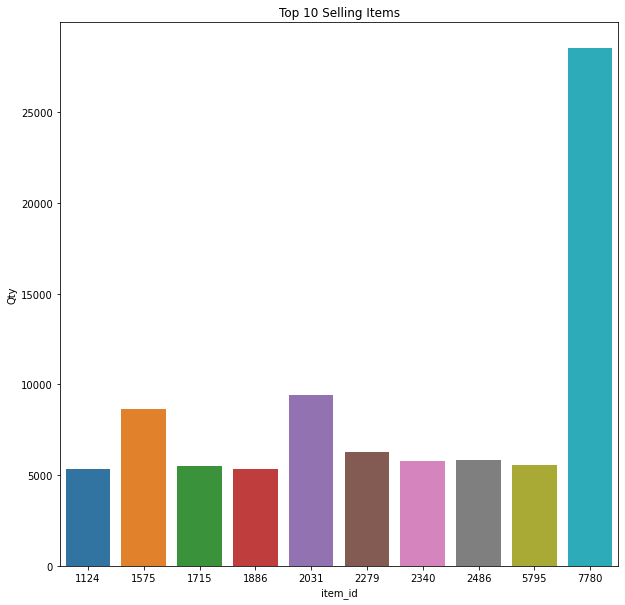

In [61]:
X = top_selling_item_df['item_id']
Y = top_selling_item_df['Qty']
plt.figure(figsize=(10,10))
plt.title("Top 10 Selling Items")
sns.barplot(x=X ,y=Y);

#### Most Category wised sold Items

In [66]:
most_rated_items = (product_df[product_df['rating']>=4.0]
                    .groupby(['item_id','category'])['rating']
                    .sum().reset_index())
most_rated_items

,item_id,category,rating
0,0,Portable Audio & Video,323
1,1,Computers & Accessories,194
2,2,Headphones,14217
3,3,Camera & Photo,390
4,4,Television & Video,35
...,...,...,...
10532,155308,Tops,47
10533,155317,Dresses,286
10534,155537,Tops,37
10535,155597,Tops,14


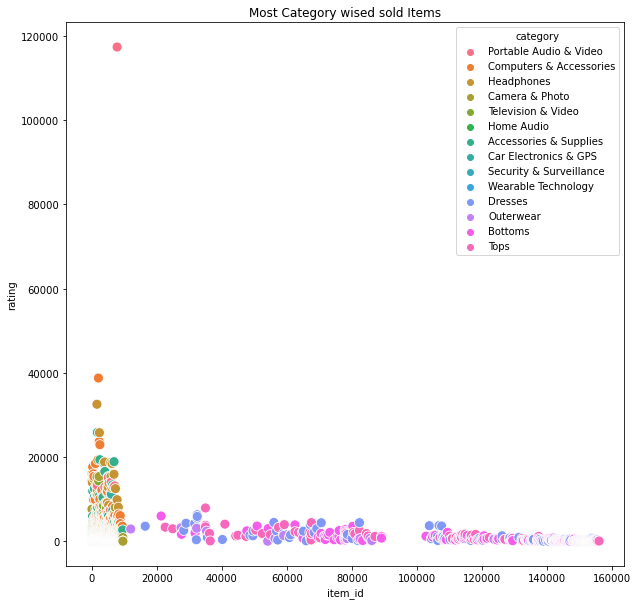

In [67]:
plt.figure(figsize=(10,10))
plt.title('Most Category wised sold Items')
sns.scatterplot(x='item_id', 
                y='rating', 
                hue='category',
                s=100,
                data=most_rated_items);

In [73]:
selling_item_overyear_df = product_df.groupby('year').count()[['item_id']].sort_values('year',ascending=False).reset_index().head(10)
selling_item_overyear_df

,year,item_id
0,2019,3483
1,2018,20853
2,2017,23339
3,2016,72967
4,2015,381385
5,2014,287211
6,2013,175972
7,2012,142266
8,2011,88955
9,2010,51169


### Finding the total ratings count according to the item per User given

In [25]:
#count total ratings per item 

product_ratingCount = (product_df.
     groupby(by = ['item_id'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['item_id', 'totalRatingCount']]
    )
product_ratingCount.head()

,item_id,totalRatingCount
0,0,118
1,1,58
2,2,3404
3,3,155
4,4,11


In [26]:
# merge the total rating with product_df

product_with_totalRatingCount = product_ratingCount.merge(product_df, left_on = 'item_id', right_on = 'item_id', how = 'left')
product_with_totalRatingCount.head()

,item_id,totalRatingCount,user_id,rating,timestamp,category,brand,year,Qty
0,0,118,0,5,1999-06-13 00:00:00,Portable Audio & Video,Others,1999,1
1,0,118,1,5,1999-06-14 00:00:00,Portable Audio & Video,Others,1999,1
2,0,118,2,3,1999-06-17 00:00:00,Portable Audio & Video,Others,1999,1
3,0,118,3,1,1999-07-01 00:00:00,Portable Audio & Video,Others,1999,1
4,0,118,4,2,1999-07-06 00:00:00,Portable Audio & Video,Others,1999,1


In [27]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(product_with_totalRatingCount['totalRatingCount'].describe())

count   1392846.000
mean       1857.416
std        4197.570
min           1.000
25%         203.000
50%         639.000
75%        1755.000
max       28530.000
Name: totalRatingCount, dtype: float64


#### Define the popularity threshold from which we can select the most rated product

In [42]:
popularity_threshold = 2500
popular_rated_item = product_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
popular_rated_item.head()

,item_id,totalRatingCount,user_id,rating,timestamp,category,brand,year,Qty
176,2,3404,16,4,1999-10-25 00:00:00,Headphones,Others,2000,1
177,2,3404,34,5,1999-12-05 00:00:00,Headphones,Others,2000,1
178,2,3404,83,5,2000-04-05 00:00:00,Headphones,Others,2000,1
179,2,3404,103,5,2000-05-14 00:00:00,Headphones,Others,2000,1
180,2,3404,136,4,2000-06-24 00:00:00,Headphones,Others,2000,1


In [29]:
popular_rated_item.shape

(283459, 9)

### Implementing KNN Algorithm

Convert the table into 2D matrix and fill the missing values with zero, because we will calculate distance between rating vectors. Then transfer the ratings of the matrix dataframe into the scipy sparse matrix for more efficient calculation.
Finding the Nearest Neighbor we used unsupervised algorithm with sklearn neighbor. The algorithm to compute the nearest neighbor is "brute" and metric is "cosine" so that the algorithm will calculate the cosine similarity between rating vector. After that we fit the model. 

In [30]:
# lets create a Pivot matrix between items and user to place the ratings in between

product_features_df = popular_rated_item.pivot_table(index='item_id',columns='user_id',values='rating').fillna(0)
product_features_df.head()

user_id,16,34,83,103,131,136,146,184,198,211,...,1157483,1157484,1157487,1157489,1157490,1157496,1157497,1157499,1157506,1157513
item_id,,,,,,,,,,,,,,,,,,,,,
2,4.0,5.0,5.0,5.0,0.0,4.0,4.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating the CSR Matrix for Pivot matrix

In [31]:
# Creating csr_matrix

product_features_df_matrix = csr_matrix(product_features_df.values.astype(float))
product_features_df_matrix

<67x274533 sparse matrix of type '<class 'numpy.float64'>'
	with 283459 stored elements in Compressed Sparse Row format>

### Building KNN model

In [32]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(product_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [33]:
product_features_df.shape

(67, 274533)

In [34]:
query_index = np.random.choice(product_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(product_features_df.iloc[query_index,:].values.astype(float).reshape(1, -1), n_neighbors = 6)

44


In [35]:

product_features_df.head()

user_id,16,34,83,103,131,136,146,184,198,211,...,1157483,1157484,1157487,1157489,1157490,1157496,1157497,1157499,1157506,1157513
item_id,,,,,,,,,,,,,,,,,,,,,
2,4.0,5.0,5.0,5.0,0.0,4.0,4.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for The Selected Item are {0}:\n'.format(product_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, product_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Selected Item are 4718:

1: 274, with distance of 0.9743959878832131:
2: 468, with distance of 0.9893564532049295:
3: 2031, with distance of 0.993673492434875:
4: 4808, with distance of 0.9944702334198869:
5: 5884, with distance of 0.9954390171084344:


#### Check whether the "query_index"(Item_Id) is present in the dataset or not!

In [41]:
4718 in product_df.item_id.tolist()

True